In [23]:
%run '0.0_init_configuration.ipynb'

In [24]:
df = pd.read_csv('./churndata_processed.csv')
df.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0


### Question 4
- Now that the data are encoded and scaled, separate the features (X) from the target (y, churn_value).
- Split the sample into training and test samples, with the test sample representing 40% of observations.
- Estimate a K-Nearest Neighbors model, using K=3.
- Examine the Precision, Recall, F-1 Score, and Accuracy of the classification.
- Use a graphic to illustrate the Confusion Matrix.

In [25]:
# Set up X and y Variable
y, X = df['churn_value'], df.drop(columns='churn_value')

# Split the data into  training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Stimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Precision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2048
           1       0.77      0.72      0.74       770

    accuracy                           0.86      2818
   macro avg       0.83      0.82      0.82      2818
weighted avg       0.86      0.86      0.86      2818

Accuracy Score:  0.86
F1 Score:  0.74


- Interpretación: el 86% de las predicciones fueron correctas.

- ¿De todos los que el modelo dijo que se iban, cuántos realmente se fueron? 74%



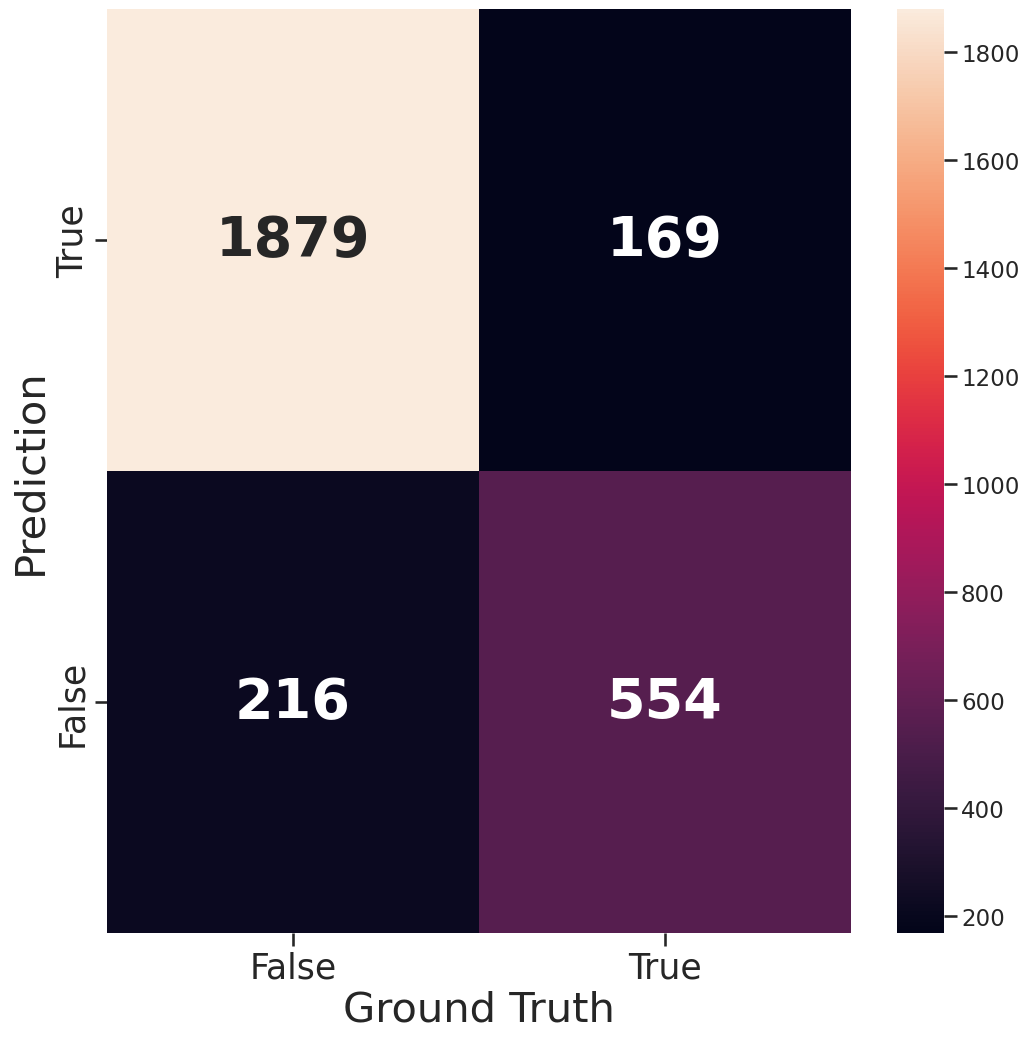

In [26]:
# Plot confusion matrix
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                 annot=True, fmt='d',
                 annot_kws={'size':40, 'weight':'bold'})
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25)
ax.set_yticklabels(labels[::-1], fontsize=25)
ax.set_ylabel('Prediction', fontsize=30)
ax.set_xlabel('Ground Truth', fontsize=30)
plt.show()

- TN (True Negative) = 1879 → el modelo predijo que no habría churn, y efectivamente no hubo churn.

- FP (False Positive) = 169 → el modelo dijo que habría churn, pero no lo hubo.

- FN (False Negative) = 216 → el modelo dijo que no habría churn, pero sí hubo churn.

- TP (True Positive) = 554 → el modelo predijo churn, y acertó.

### Question 6

- To determine the right value for K, examine results for values of K from 1 to 40.
- This time, focus on two measures, the F-1 Score, and the Error Rate (1-Accuracy).
- Generate charts which plot each of these measures as a function of K.
- What do these charts suggest about the optimal value for K?

In [27]:
max_k = 40
f1_scores = list()
error_rates = list() # 1 - accuracy

for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1 - round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))

f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])


<Figure size 1920x1440 with 0 Axes>

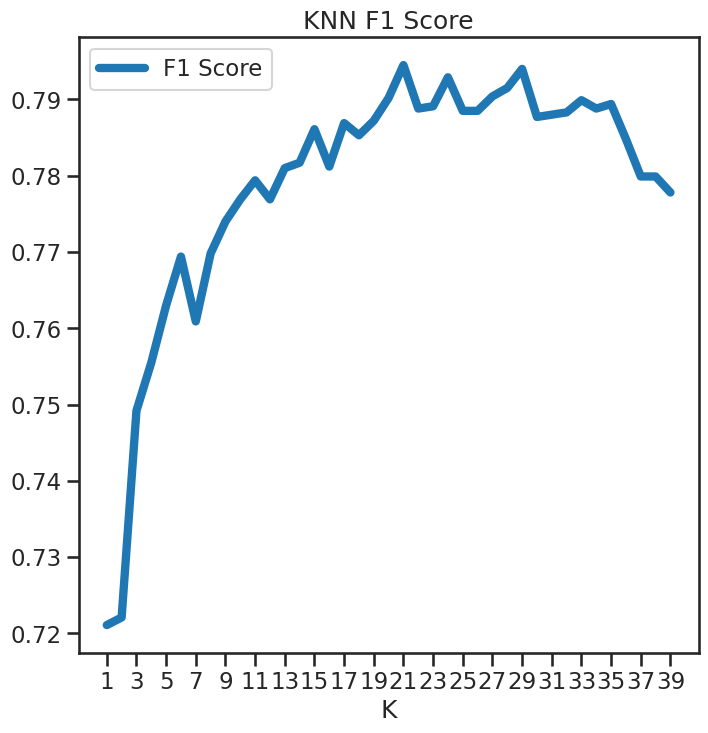

In [28]:
#Plot f1 Results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(8,8), linewidth=6)
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')
plt.show()

<Figure size 1920x1440 with 0 Axes>

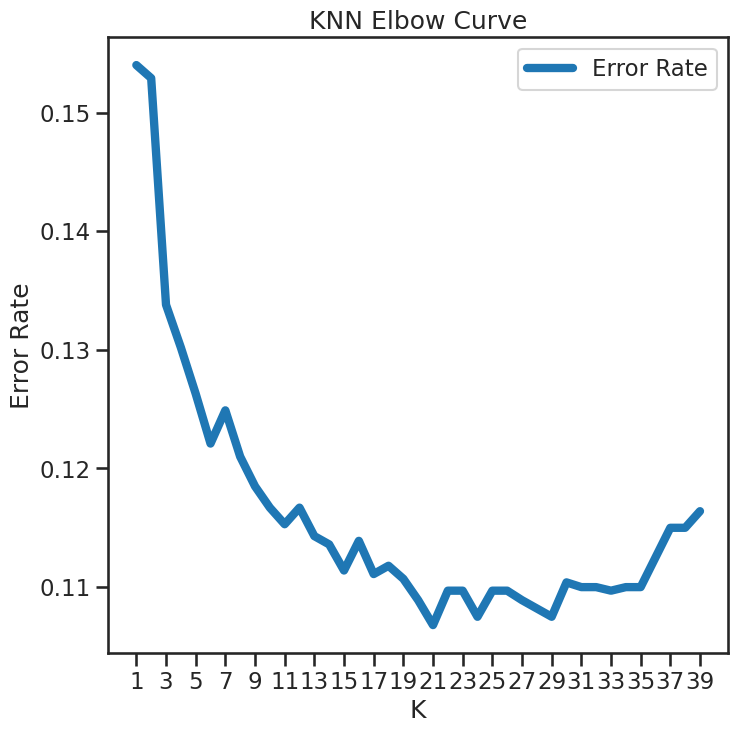

In [29]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(8, 8), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')
plt.show()
### END SOLUTION